In [1]:
#Read the file with the help of pandas library and print first two elements 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataframe=pd.read_csv(r"D:\Data science\Data sets\amazon-fine-food-reviews\Reviews.csv")
dataframe.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


<h3><b><u>Data visualisation for amazon food reviews</u></b></h3>

<b>1.Positive reviews are very common</b>

In [2]:
dataframe.groupby('Score').Score.count()

Score
1.0     3218
2.0     2006
3.0     2860
4.0     5071
5.0    22017
Name: Score, dtype: int64

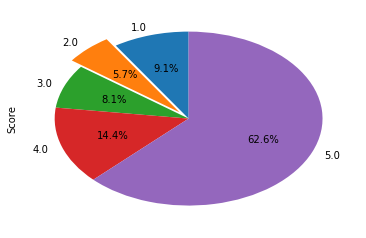

In [3]:
%matplotlib inline
dataframe.groupby('Score').Score.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

<font face="verdana" color="green" span style="font-weight:bold">Observation 1:</font>
<p>a.The score plot for each score is as shown above.</p>
<p>b.For this case study we are considering the reviews with score rating 4 and 5 as positive.The score with 1 and 2 as negative and the rating with 3 is not useful for making any decisions.So we are neglecting the score of 3</p>
<p>c.So if we calculate the positive reviews percentage it is 62.6+14.4=77.0% and negative reviews percentage is 14.8%</p>
<p>d.So we can conclude that positive reviews are very common</p>



<b>2.Positive reviews are shorter.</b>

In [4]:
#Partion the data into positive and negative based on score as earlier discussed and map the rating to each score 
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

Score = dataframe['Score']
Score = Score.map(partition)
dataframe['Rating']=Score
dataframe.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive


In [5]:
data=dataframe.copy()
word_count1,word_count2,word_count3=[],[],[]
for s1 in data.Summary:
    word_count1.append(len(str(s1).split()))
for s2 in data.Text:
    word_count2.append(len(str(s2).split()))
word_count3=[x + y for x, y in zip(word_count1, word_count2)]


In [6]:
#Add newly created word_count3 column to data series
data['word_count']=word_count3

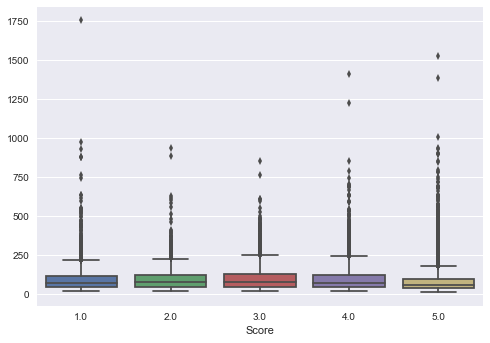

In [7]:
import seaborn as sns
sns.boxplot(x="Score",y=word_count3,data=data)
sns.plt.show()

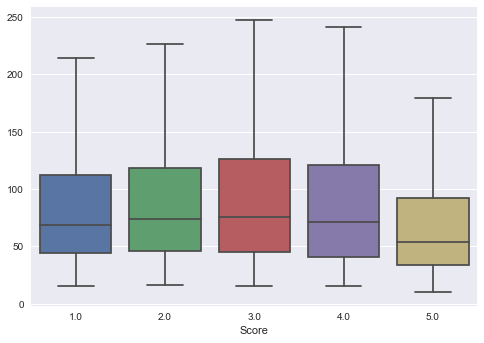

Score
1.0    69
2.0    74
3.0    76
4.0    71
5.0    54
Name: word_count, dtype: int64

In [8]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
sns.boxplot(x="Score",y=word_count3,data=data,showfliers=False)
sns.plt.show()
data.groupby('Score').word_count.median()

<font face="verdana" color="green" span style="font-weight:bold">Observation 2:</font>
<p>a.Above is plot for number of words in each rating.</p>
<p>b.Since beacause of outliers it is not much distinguishable in plot 1.So Plot 2 is after removal of outliers</p>
<p>c.Its clear from the box plot that median of no. of words in case of 4 and 5 rating is less compared to 1 and 2 </p>
<p>d.For verification use groupby function with score and find median.Then its clealy distinguishable</p>



<b>3.Longer reviews are more helpful.</b>

In [9]:
#Finding the helpful ratio
#Helpfulness=[(h1/h2) for h1 in data.HelpfulnessNumerator for h2 in data.HelpfulnessDenominator]
Helpfulness=[]
for n in data.Id:
    Helpfulness.append(data.HelpfulnessNumerator[n-1]/data.HelpfulnessDenominator[n-1])

#Since above list of helpfulness contains nan, replace the values with Zero
import numpy as np
Helpfulness=np.nan_to_num(Helpfulness)
#We will keep a copy of Helpfullness
Helpfulness_Ratio=Helpfulness.copy()

In [10]:
#Add Helpfullness column to data frame
data['Helpfulness']=Helpfulness
data['Helpfulness_Ratio']=Helpfulness_Ratio

In [11]:
data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating,word_count,Helpfulness,Helpfulness_Ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,52,1.0,1.0


In [12]:
#Now we will binarise the helpfullness to Helpful,Not helpful 
def partition(x):
    if x < 0.75:
        return 'Not Helpful'
    return 'Helpful'
Helpfulness=data['Helpfulness']
Helpfulness=Helpfulness.map(partition)
data['Helpfulness']=Helpfulness

In [13]:
words_count_new=[]
help_ratio_new=[]
for n in data.Id:
    if data.word_count[n-1]>500:
        words_count_new.append(data.word_count[n])
        help_ratio_new.append(data.Helpfulness[n])


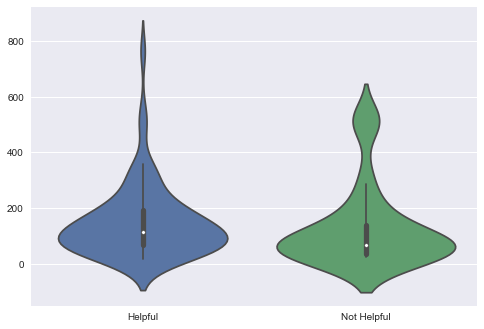

,mean,median
Helpfulness,,
Helpful,94.972204,69
Not Helpful,76.679388,55


In [14]:
import seaborn as sns
sns.violinplot(x=help_ratio_new, y=words_count_new,data=data,size=6,showfliers=False)
sns.plt.show()
data.groupby('Helpfulness').word_count.agg(['mean','median'])

<font face="verdana" color="green" span style="font-weight:bold">Observation 3:</font>
<p>a.Above is voilin plot for number of words in Helpful and not Helpful ratings.</p>
<p>b.From VOilin plot we can notice that median for number of words lies above in case of Helpfull</p>
<p>c.For verification use groupby function with Helpfulness and word count find  mean median.Both mean and median have a high value</p>



<b>4.Despite being more common and shorter, positive reviews are found more helpful.</b>

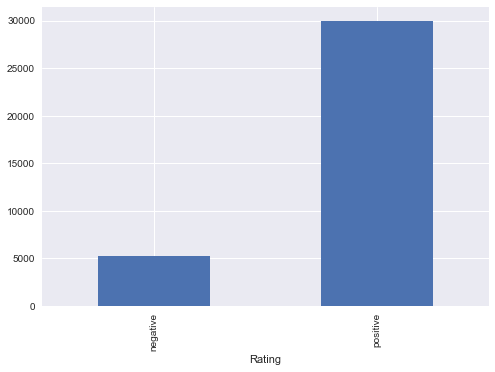

In [15]:
data.groupby('Rating').Helpfulness.count().plot(kind='bar')

<font face="verdana" color="green" span style="font-weight:bold">Observation 4:</font>
<p>a.Above is bar graph plot for positive and negative reviews against Helpfulness.</p>
<p>b.So the number for postive reviews is much higher compared to negative.
<p>c.Positive reviews are helpfull in more than 30000 cases were as negative reviews are less helpful that is around 5000 cases</p>



<b>5.Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews.</b>

In [16]:
#Find the frequency of user ordering the product 
import collections
user=data['UserId']
counter = collections.Counter(user) 

In [17]:
#based on his ordering if the consumer has ordered the products more than 5 times than consider him as frequent user
Frequent=[]
for n in data.UserId:
    if counter[n]>5:
        Frequent.append('Frequent')
    else:
        Frequent.append('Not Frequent')

In [18]:
#Now add this frequent column to data
data['Frequent']=Frequent

Frequent
Frequent        4.271255
Not Frequent    4.152791
Name: Score, dtype: float64

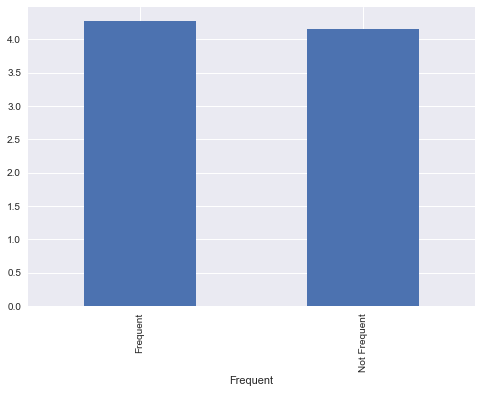

In [19]:
data.groupby('Frequent').Score.mean().plot(kind='bar')
data.groupby('Frequent').Score.mean()

<font face="verdana" color="green" span style="font-weight:bold">Observation 5.a:</font>
<p>a.Above is bar graph plot for Frequent user and not frequent user vs Score.</p>
<p>b.So the frequent user score mean is 4.27 and Not frequent user score is 4.15</p>
<p>c.What it really means is frequent user on an average he is giving a Score(rating) of product 4.27 where as not frequent user on an average he is giving a Score(rating) of 4.15 </p>
<p>d.So Frequent reviewers are more discerning in their ratings </p>

Frequent
Frequent        117
Not Frequent     59
Name: word_count, dtype: int64

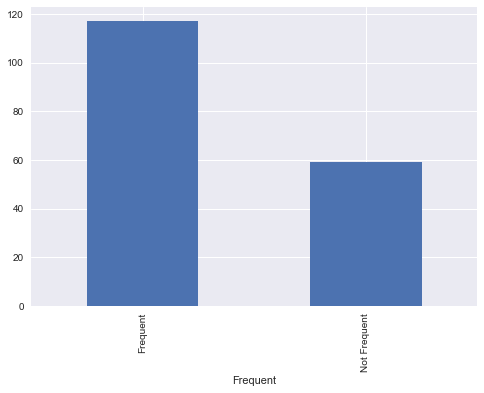

In [20]:
data.groupby('Frequent').word_count.median().plot(kind='bar')
data.groupby('Frequent').word_count.median()

<font face="verdana" color="green" span style="font-weight:bold">Observation 5.b:</font>
<p>a.Above is bar graph plot for Frequent user and not frequent user vs Word count.</p>
<p>b.So the frequent user word count median is 117 and Not frequent user word count median is 59</p>
<p>c.So Frequent reviewers write longer reviews </p>

<p><b>Note</b>:Here we are taken median because some user may write very lengthy review and some user very short reviews.So instead of mean,median is best suited here</p>

Frequent
Frequent        0.473373
Not Frequent    0.388615
Name: Helpfulness_Ratio, dtype: float64

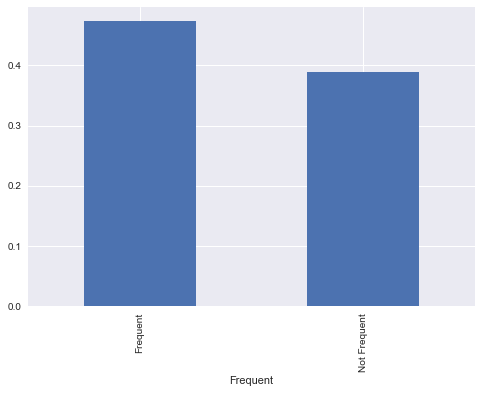

In [23]:
#write more helpful reviews.
data.groupby('Frequent').Helpfulness_Ratio.mean().plot(kind='bar')
data.groupby('Frequent').Helpfulness_Ratio.mean()

<font face="verdana" color="green" span style="font-weight:bold">Observation 5.c:</font>
<p>a.Above is bar graph plot for Frequent user and not frequent user vs Helpfullness ratio.</p>
<p>b.So the frequent user helpfullness ratio is 0.4733 and Not frequent user helpfullness ratio is 0.3886</p>
<p>c.So Frequent reviewers write more helpful reviews </p>

<p><b>Note</b>:Here we are taken mean because helpfulness ratio is ranging between 0 to 1.So instead of mean,median is best suited here</p>